In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import random

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Observerd performance

In [2]:
single_drug = pd.read_csv('single_drug_id.csv')

In [3]:
X = single_drug.iloc[:,0:509] # ADMET + SSP + DTI
y = single_drug.iloc[:,509] # Scaffold fold id

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

In [ ]:
model = LGBMClassifier(verbose = 0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

/root/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [10]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.37      0.52      0.43        60
           1       0.52      0.55      0.53        85
           2       0.41      0.21      0.28        53
           3       0.44      0.40      0.42        60
           4       0.46      0.47      0.47        59

    accuracy                           0.44       317
   macro avg       0.44      0.43      0.43       317
weighted avg       0.45      0.44      0.44       317



# Null distribution

In [ ]:
acc_vec = []
# The lines below may take a long time to execute.
for i in range(1000):
    random.seed(i)
    y_train_shuffled = list(y_train)
    y_train_shuffled = random.sample(y_train_shuffled, len(y_train_shuffled))

    model = LGBMClassifier(verbose = 0)
    model.fit(X_train, list(y_train_shuffled))
    preds = model.predict(X_test)

    acc_vec.append(accuracy_score(y_test, preds))

with open(f"accuracy_null_dist.pkl", "wb") as f:
    pickle.dump(acc_vec, f)

# Calculate p-value

In [11]:
with open(f"accuracy_null_dist.pkl", 'rb') as file:
    acc_vec = pickle.load(file)
    
observed_accuracy = 0.44
print("P-value: ", sum(list(map(lambda x: x > observed_accuracy, acc_vec))))

P-value:  0


# Visulalization

Text(0.29000000000000004, 50, 'Observed Accuracy')

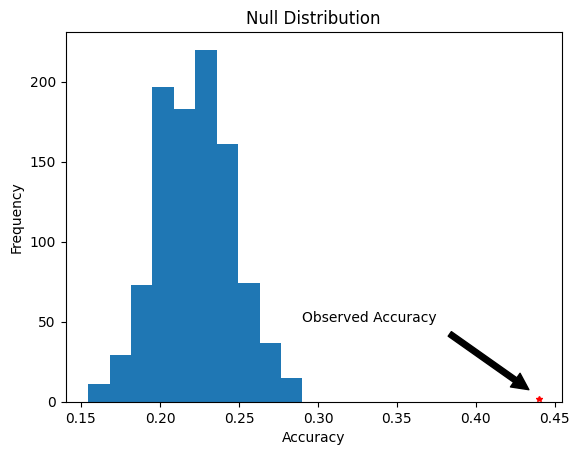

In [12]:
plt.hist(acc_vec)
plt.title('Null Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.plot(observed_accuracy, 2, 'r*', markersize=4, label=f'Observed Accuracy = {observed_accuracy}')
plt.annotate(f'Observed Accuracy', 
             xy=(observed_accuracy, 3), 
             xytext=(observed_accuracy - 0.15, 50),
             arrowprops=dict(facecolor='black', shrink=0.1))